In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
train = pd.read_csv('Advertisement.csv')

In [38]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0


In [39]:
train.shape

(1000, 10)

In [40]:
train.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


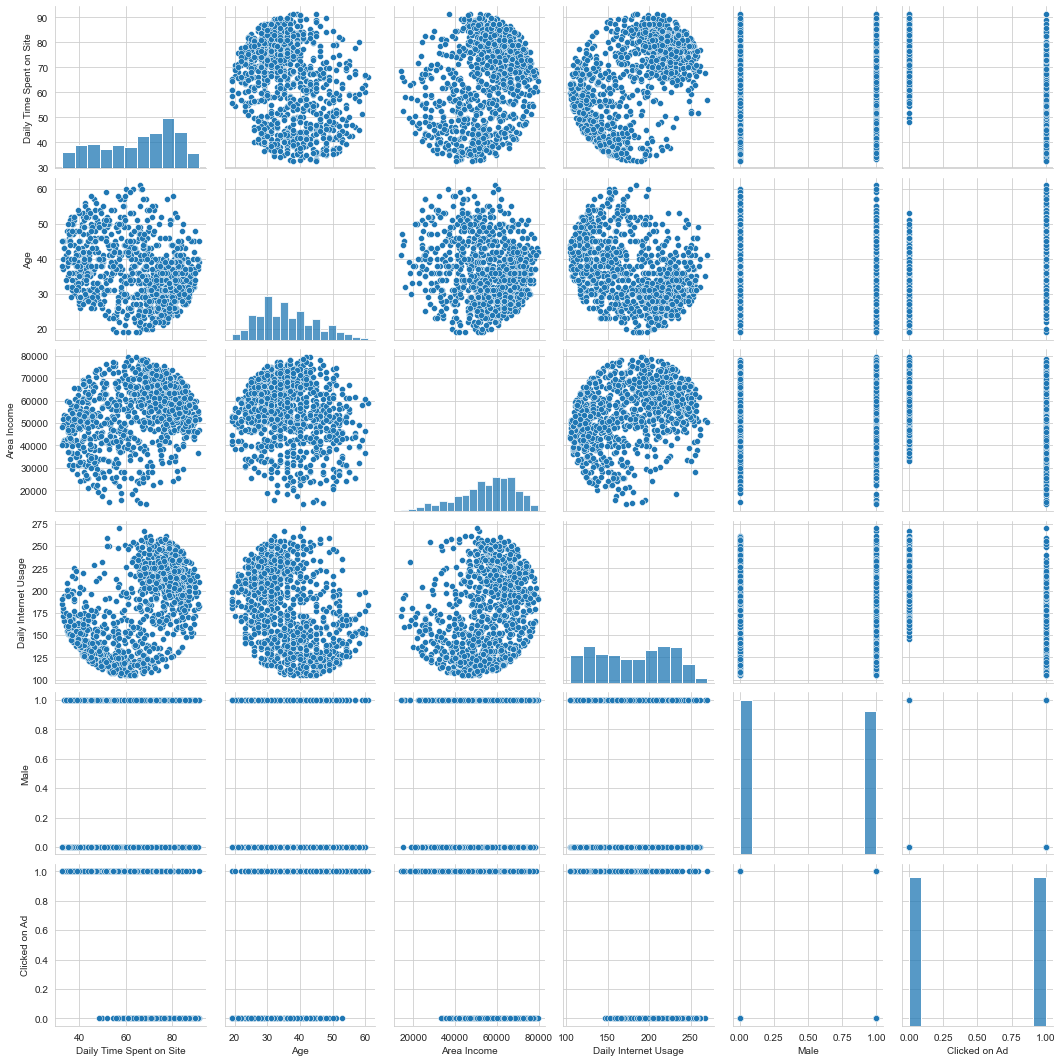

In [41]:
sns.pairplot(train)

Text(0.5, 0, 'Age')

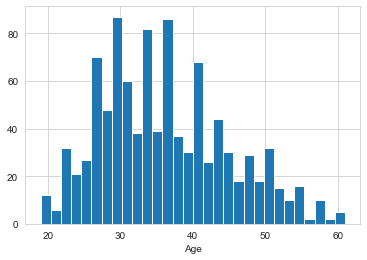

In [42]:
sns.set_style('whitegrid')
train['Age'].hist(bins=30)
plt.xlabel('Age')

In [43]:
pd.crosstab(train['Country'], train['Clicked on Ad']).sort_values( 1,ascending = False).tail(10)

Clicked on Ad,0,1
Country,,
Slovakia (Slovak Republic),2,0
Lesotho,1,0
Malaysia,3,0
Mozambique,1,0
Nepal,3,0
Nicaragua,3,0
Niue,3,0
Reunion,2,0
Panama,2,0


In [44]:
train[train['Clicked on Ad']==1]['Country'].value_counts().head(10)

Ethiopia         7
Australia        7
Turkey           7
Liechtenstein    6
South Africa     6
Liberia          6
Senegal          5
Afghanistan      5
Peru             5
France           5
Name: Country, dtype: int64

In [45]:
train['Country'].value_counts().head(10)

Czech Republic    9
France            9
Australia         8
Cyprus            8
South Africa      8
Senegal           8
Liberia           8
Turkey            8
Peru              8
Micronesia        8
Name: Country, dtype: int64

In [46]:
train.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

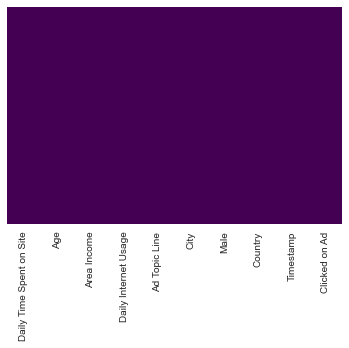

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
train['Timestamp'] = pd.to_datetime(train['Timestamp']) 

In [49]:
train['Month'] = train['Timestamp'].dt.month 
train['Day'] = train['Timestamp'].dt.day 
train['Hour'] = train['Timestamp'].dt.hour   
train["Weekday"] = train['Timestamp'].dt.dayofweek 
train = train.drop(['Timestamp'], axis=1)

In [50]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


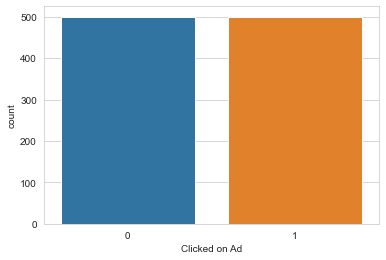

In [51]:
sns.countplot(x = 'Clicked on Ad', data = train)

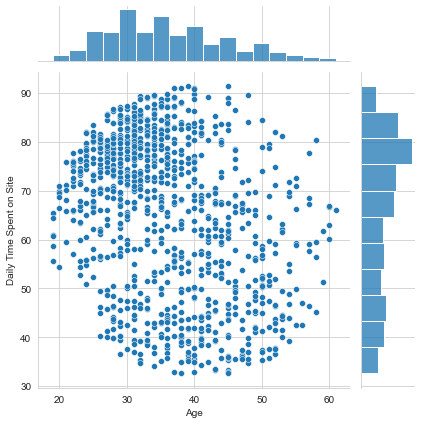

In [52]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = train) 

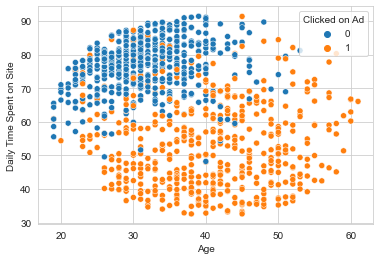

In [54]:
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = train) 

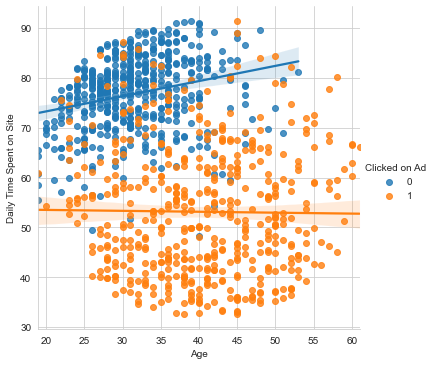

In [55]:
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data =train) 

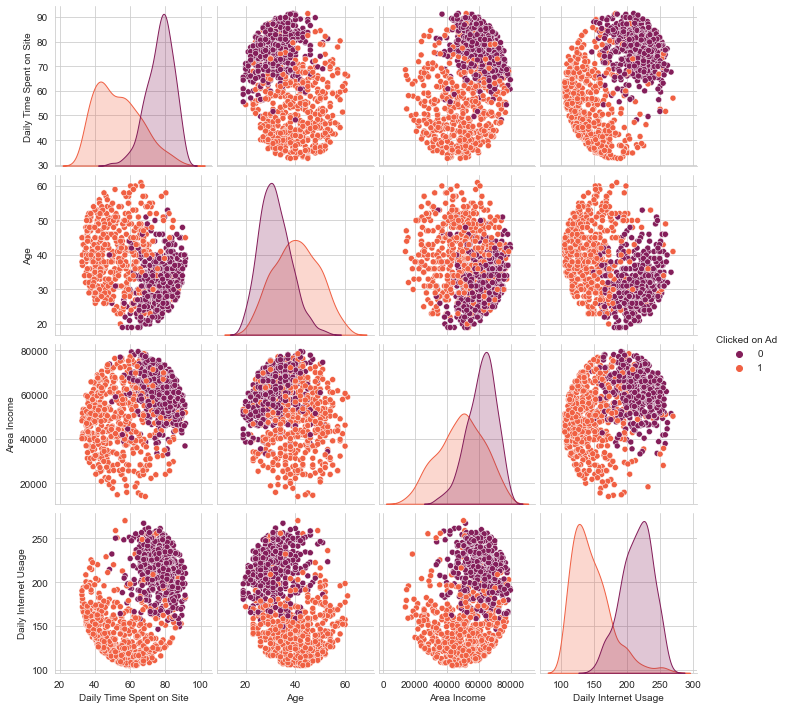

In [56]:
sns.pairplot(train, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

C:\Users\oguru\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


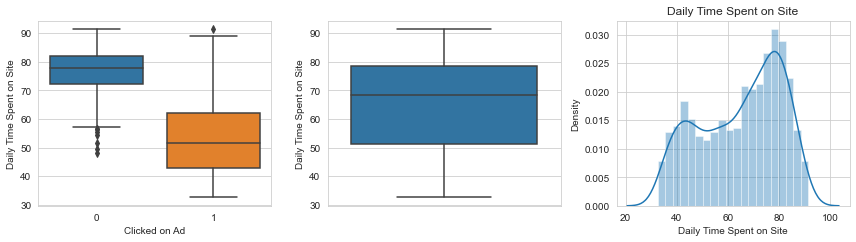

C:\Users\oguru\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


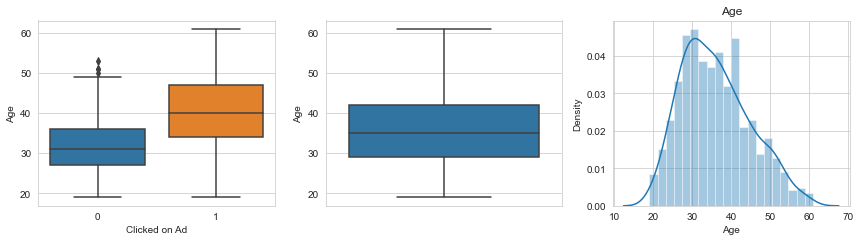

C:\Users\oguru\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


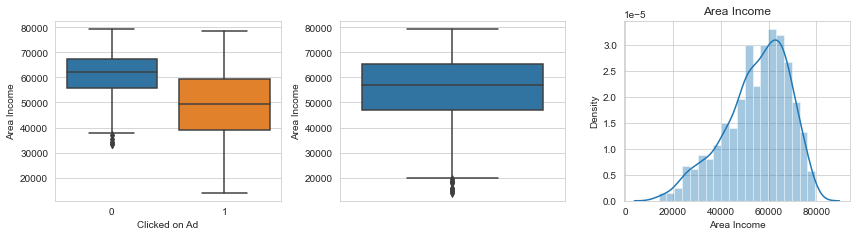

C:\Users\oguru\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


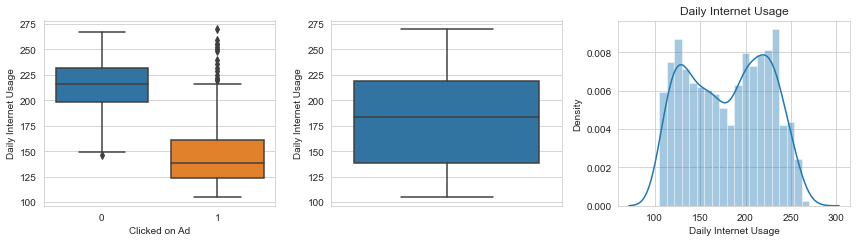

In [57]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= train, y=train[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= train, y=train[i])
    plt.subplot(2,3,3)
    sns.distplot(train[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()
    

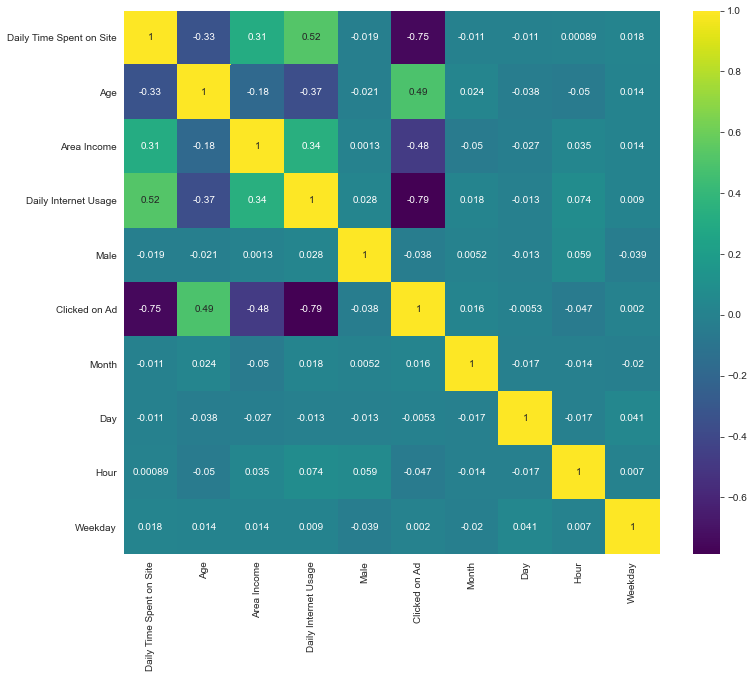

In [58]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(train.corr(), cmap='viridis', annot = True)

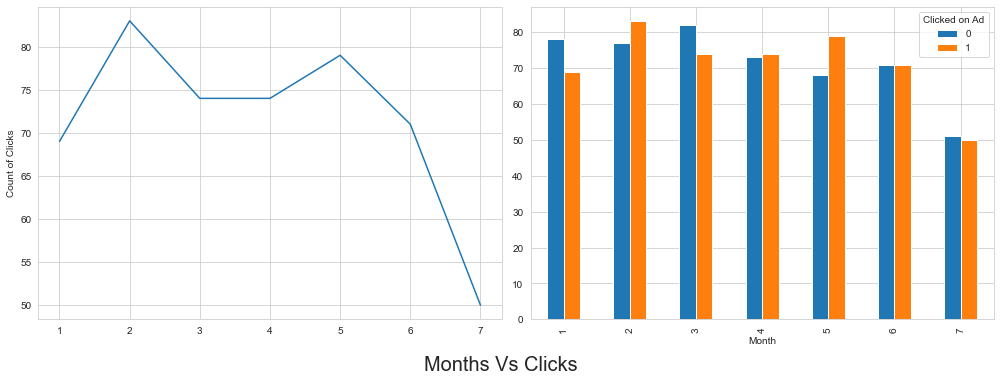

In [60]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
train['Month'][train['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(train["Clicked on Ad"], train["Month"]).T.plot(kind = 'bar',ax=ax[1])
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

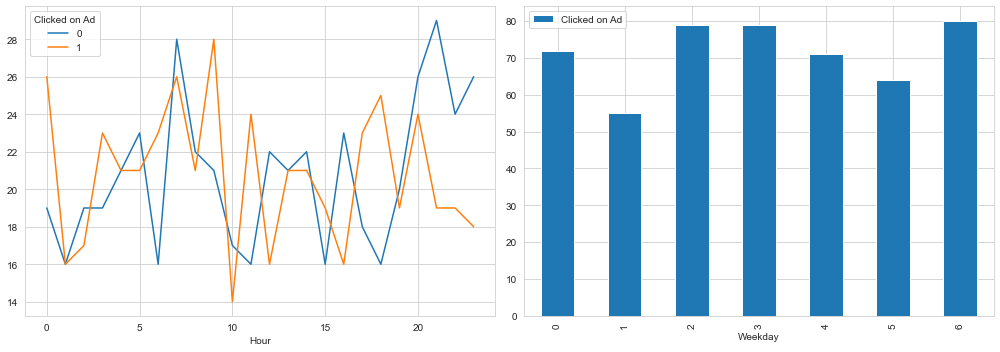

In [61]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(train["Clicked on Ad"], train["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(train, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X = train[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = train['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(670, 5) (670,)
(330, 5) (330,)


In [63]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

C:\Users\oguru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predictions = logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [67]:
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[170   1]
 [  5 154]]


In [68]:
logmodel.coef_

array([[-1.46364143e-01,  1.43155621e-01, -1.01385732e-04,
        -5.83735442e-02,  1.36449180e+00]])